# Introduction to SVMs: 
In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

#### What is Support Vector Machine?

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification, implicitly mapping their inputs into high-dimensional feature spaces.

#### What does SVM do?

Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

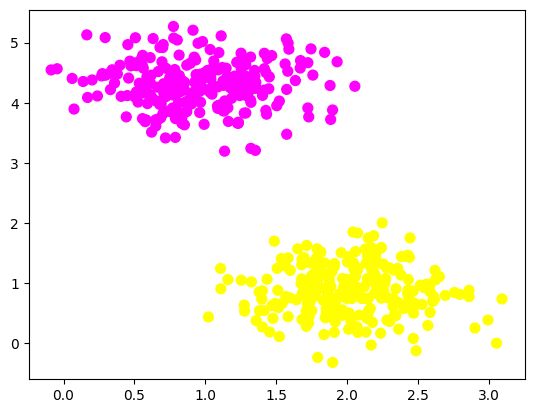

In [1]:
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,
				random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show() 


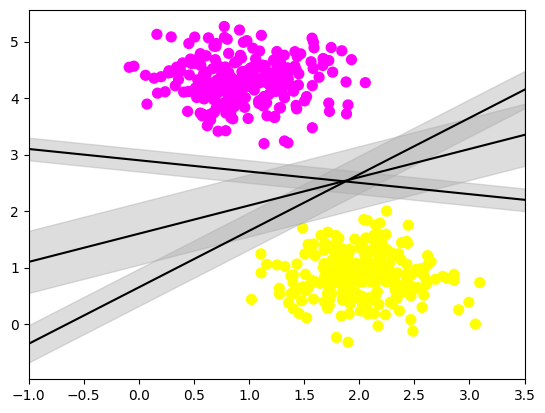

In [3]:
import numpy as np
# creating linspace between -1 to 3.5 
xfit = np.linspace(-1, 3.5)

# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
	yfit = m * xfit + b
	plt.plot(xfit, yfit, '-k')
	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
	color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()


# Using SVM to perform classification on a non-linear dataset

For a linearly separable dataset having n features (thereby needing n dimensions for representation), a hyperplane is basically an (n – 1) dimensional subspace used for separating the dataset into two sets, each set containing data points belonging to a different class. For example, for a dataset having two features X and Y (therefore lying in a 2-dimensional space), the separating hyperplane is a line (a 1-dimensional subspace). Similarly, for a dataset having 3-dimensions, we have a 2-dimensional separating hyperplane, and so on.
In machine learning, Support Vector Machine (SVM) is a non-probabilistic, linear, binary classifier used for classifying data by learning a hyperplane separating the data.

Classifying a non-linearly separable dataset using a SVM – a linear classifier:
As mentioned above SVM is a linear classifier which learns an (n – 1)-dimensional classifier for classification of data into two classes. However, it can be used for classifying a non-linear dataset. This can be done by projecting the dataset into a higher dimension in which it is linearly separable!

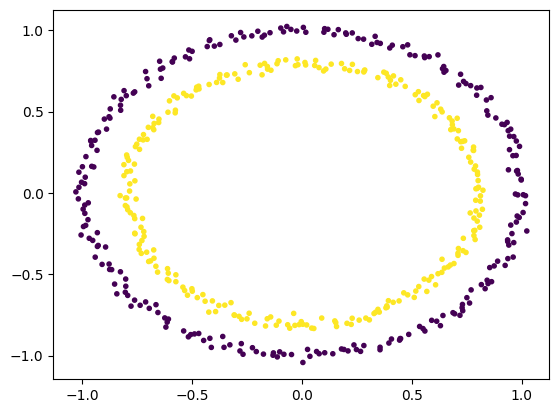

In [5]:
# importing libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from mpl_toolkits.mplot3d import Axes3D 

# generating data 
X, Y = make_circles(n_samples = 500, noise = 0.02) 

# visualizing data 
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') 
plt.show() 

The dataset is clearly a non-linear dataset and consists of two features (say, X and Y).

In order to use SVM for classifying this data, introduce another feature Z = X2 + Y2 into the dataset. Thus, projecting the 2-dimensional data into 3-dimensional space. The first dimension representing the feature X, second representing Y and third representing Z (which, mathematically, is equal to the radius of the circle of which the point (x, y) is a part of). Now, clearly, for the data shown above, the ‘yellow’ data points belong to a circle of smaller radius and the ‘purple’ data points belong to a circle of larger radius. Thus, the data becomes linearly separable along the Z-axis.

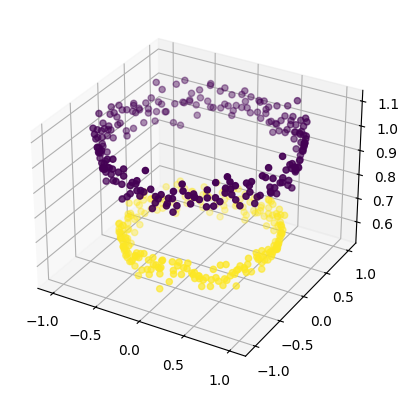

In [6]:
# adding a new dimension to X 
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3)) 

# visualizing data in higher dimension 
fig = plt.figure() 
axes = fig.add_subplot(111, projection = '3d') 
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
plt.show() 


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

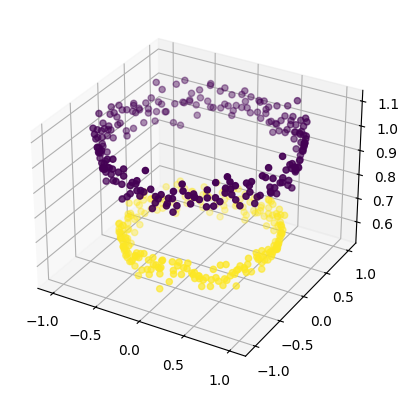

In [7]:
# create support vector classifier using a linear kernel 
from sklearn import svm 

svc = svm.SVC(kernel = 'linear') 
svc.fit(X, Y) 
w = svc.coef_ 
b = svc.intercept_ 

# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 
